In [1]:
#Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from api_keys import gkey
import requests
from scipy.stats import linregress

gmaps.configure(api_key=gkey)

In [2]:
#Import Data From CSV.file And Drop Unwanted Columns

file=pd.read_csv('InputData/listings.csv')
file=file.drop(['neighbourhood_group','license','number_of_reviews_ltm','calculated_host_listings_count',
                'host_name','name','host_id','reviews_per_month'],axis=1)

# Set Perth Metropolitan Area And Days For Travel Purposes 

cleaned_data=file.loc[(file['latitude']>= -32.5468)&
                      (file['latitude'] <= -31.7725)&
                      (file['longitude'] <= 116.0593)&
                      (file['minimum_nights']<=15)]


#Based On Latitude,Sorting Value From North To South

cleaned_data=cleaned_data.dropna(how='any').sort_values('latitude',ascending=False)

#Adjust The Data
cleaned_data['Occupancy']=365-cleaned_data['availability_365']

#To Camparing Two Room Types

cleaned_data=cleaned_data[(cleaned_data['room_type']=='Entire home/apt')|((cleaned_data['room_type']=='Private room'))]
cleaned_data.drop(cleaned_data[(cleaned_data['neighbourhood']=='PEPPERMINT GROVE')|
                               (cleaned_data['neighbourhood']=='MURRAY')].index, inplace = True)
cleaned_data

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,Occupancy
9217,597266527035707418,JOONDALUP,-31.77258,115.74539,Entire home/apt,198,2,8,2022-06-02,343,22
5364,38862794,WANNEROO,-31.77287,115.82548,Private room,40,6,18,2022-06-12,348,17
3423,24808964,WANNEROO,-31.77314,115.87767,Entire home/apt,110,1,178,2022-06-14,330,35
3070,22778235,JOONDALUP,-31.77332,115.73488,Entire home/apt,128,2,21,2021-08-27,317,48
3710,27191991,JOONDALUP,-31.77340,115.73292,Entire home/apt,128,2,52,2022-05-20,231,134
...,...,...,...,...,...,...,...,...,...,...,...
4850,34824234,MANDURAH,-32.54627,115.71089,Entire home/apt,600,2,33,2022-06-12,158,207
1165,10756742,MANDURAH,-32.54628,115.71190,Entire home/apt,995,2,18,2022-02-27,262,103
8185,52696667,MANDURAH,-32.54635,115.68733,Entire home/apt,186,3,7,2022-06-16,170,195
8020,52116476,MANDURAH,-32.54639,115.68400,Entire home/apt,523,3,15,2022-05-16,270,95


In [3]:
#List Neighbourhoods

neighbourhoods=cleaned_data[cleaned_data['room_type']=='Entire home/apt']['neighbourhood'].unique()

#Creat A New Dataframe To Analyse Our Questions.

listAP=[]
listAocup=[]
listPRocup=[]
listPRp=[]
listreviewshome=[]
listreviewspr=[]

for neighbourhood in neighbourhoods:
    listAP.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Entire home/apt')&(cleaned_data['neighbourhood']==neighbourhood)]['price'].mean(),2))
    listAocup.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Entire home/apt')&(cleaned_data['neighbourhood']==neighbourhood)]['Occupancy'].mean(),2))
    listPRocup.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Private room')&(cleaned_data['neighbourhood']==neighbourhood)]['Occupancy'].mean(),2))
    listPRp.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Private room')&(cleaned_data['neighbourhood']==neighbourhood)]['price'].mean(),2))
    listreviewshome.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Entire home/apt')&(cleaned_data['neighbourhood']==neighbourhood)]['number_of_reviews'].sum(),2))
    listreviewspr.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Private room')&(cleaned_data['neighbourhood']==neighbourhood)]['number_of_reviews'].sum(),2))
    
final_df=pd.DataFrame({'Neighbourhoods':neighbourhoods,
                       'Aocup':listAocup,
                       'Apt_Price':listAP,
                       'PRocup':listPRocup,
                       'PR_Price':listPRp,
                       'Home/Apt Reviews':listreviewshome,
                       'Private Rooms Reviews':listreviewspr})
final_df["Total Reviews"] = final_df["Home/Apt Reviews"] + final_df["Private Rooms Reviews"]

final_df

,Neighbourhoods,Aocup,Apt_Price,PRocup,PR_Price,Home/Apt Reviews,Private Rooms Reviews,Total Reviews
0,JOONDALUP,221.20,186.95,145.94,79.22,5195,478,5673
1,WANNEROO,191.50,141.90,34.75,49.75,767,66,833
2,SWAN,207.84,171.22,161.52,260.29,3127,1284,4411
3,STIRLING,198.50,193.75,169.93,97.12,17164,3211,20375
4,MUNDARING,226.00,134.17,287.50,45.00,534,17,551
5,BAYSWATER,196.78,143.35,183.33,61.04,5915,1383,7298
6,BASSENDEAN,182.81,145.38,155.86,48.57,1566,151,1717
7,CAMBRIDGE,210.58,191.38,136.57,92.43,3724,366,4090
8,VINCENT,201.81,147.48,224.78,91.65,9039,1770,10809
9,BELMONT,157.73,159.93,224.50,61.38,7315,4315,11630


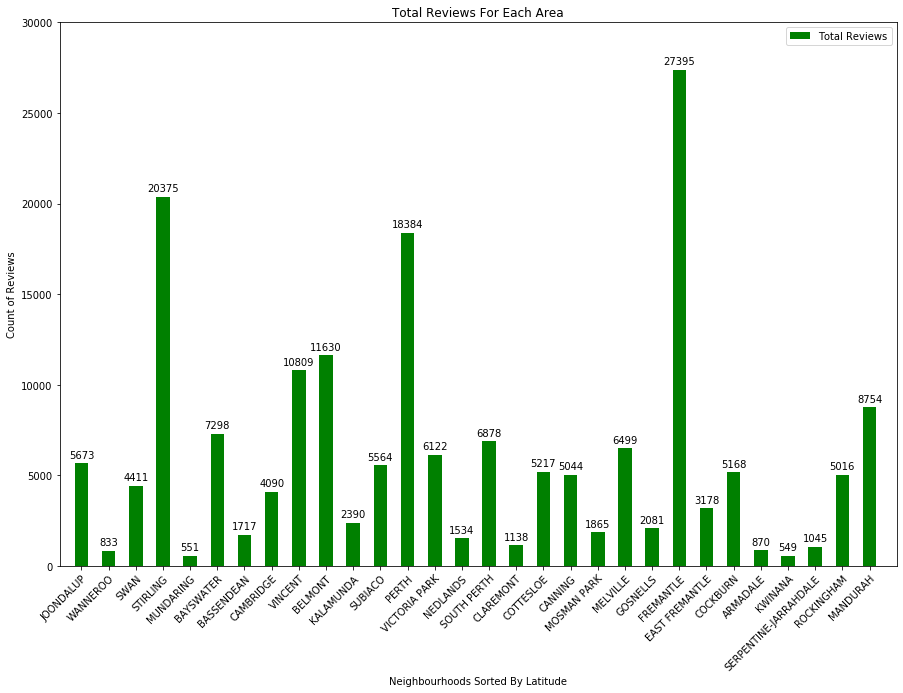

In [4]:
#Analyse The Relationship Between Neighbourhoods And Total Reviews

x_ticks=final_df['Neighbourhoods']
x_axis=np.arange(len(x_ticks))
xvalue=final_df['Total Reviews']

plt.figure(figsize=(15, 10))
plt.bar(x_axis,xvalue,facecolor='green',align='center',width=0.5,)

for x,y in enumerate(final_df['Total Reviews']):
    plt.text(x,y+300,'%s'%y,ha='center')


tick_locations = [value for value in x_axis]
labels=['Total Reviews']
plt.xticks(tick_locations,x_ticks,rotation_mode='anchor', ha="right", rotation = 45)
plt.title('Total Reviews For Each Area')
plt.xlabel('Neighbourhoods Sorted By Latitude')
plt.ylabel('Count of Reviews')
plt.xlim(-0.8,30)
plt.ylim(0,30000)
plt.legend(labels);

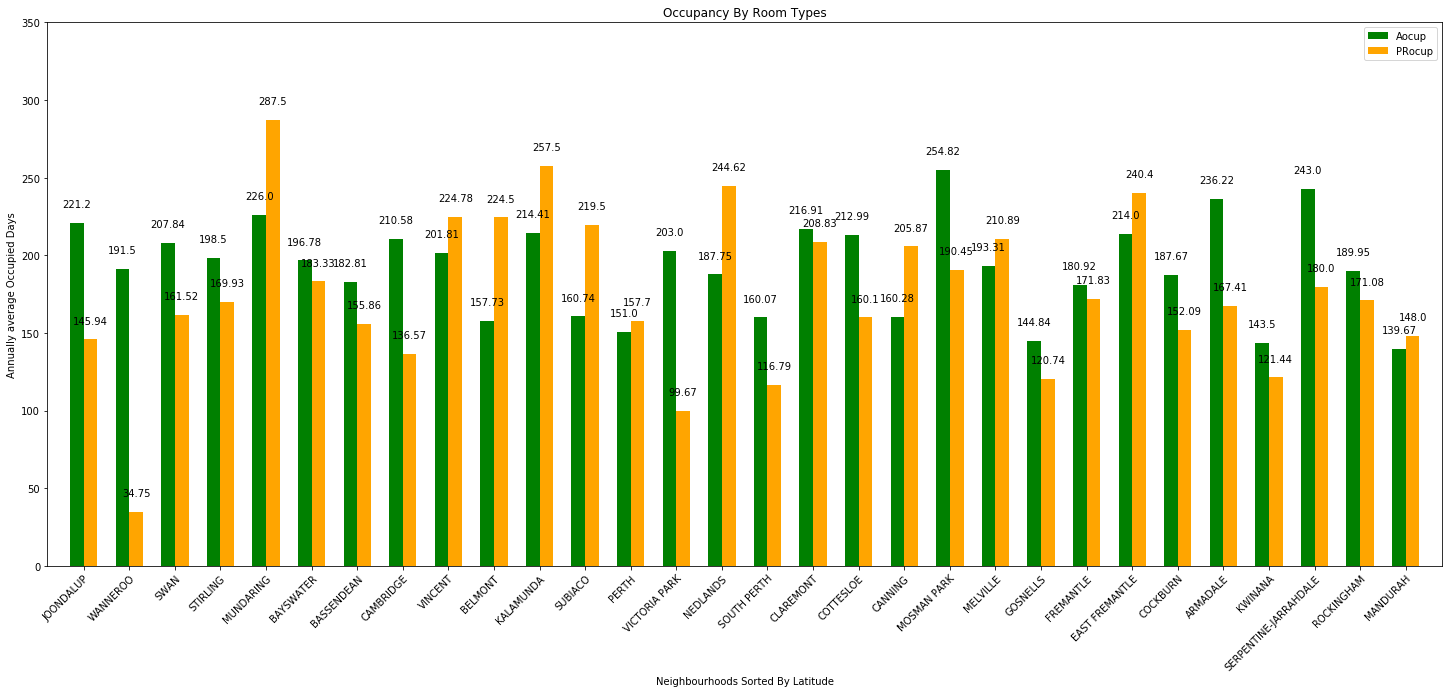

In [5]:
#Analyse The Relationship Between Neighbourhoods And Occupancy Of Two Room Types

x_ticks=final_df['Neighbourhoods']
x_axis=np.arange(len(x_ticks))
xvalue=final_df['Aocup']
x1value=final_df['PRocup']
plt.figure(figsize=(25, 10))
plt.bar(x_axis-0.15,xvalue,facecolor='green',align='center',width=0.3,)
plt.bar(x_axis+0.15,x1value,facecolor='orange',align='center',width=0.3)
for x,y in enumerate(final_df['Aocup']):
    plt.text(x-0.15,y+10,'%s'%y,ha='center')
for x,y in enumerate(final_df['PRocup']):
    plt.text(x+0.15,y+10,'%s'%y,ha='center')


tick_locations = [value for value in x_axis]
labels=['Aocup','PRocup']
plt.xticks(tick_locations,x_ticks,rotation_mode='anchor', ha="right", rotation = 45)
plt.title('Occupancy By Room Types')
plt.xlabel('Neighbourhoods Sorted By Latitude')
plt.ylabel('Annually average Occupied Days')
plt.xlim(-0.8,29.8)
plt.ylim(0,350)
plt.legend(labels);

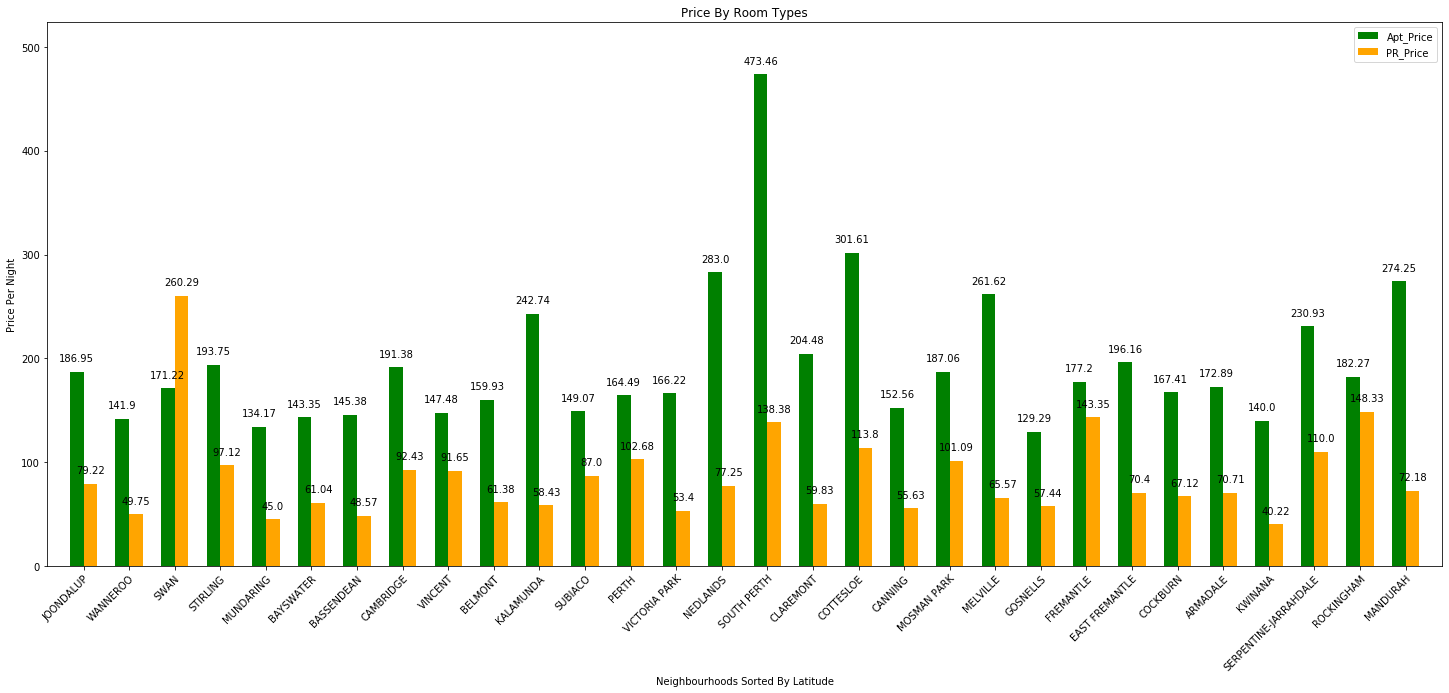

In [6]:
#Analyse The Relationship Between Neighbourhoods And Average Price Of Two Room Types

x_ticks=final_df['Neighbourhoods']
x_axis=np.arange(len(x_ticks))
xvalue=final_df['Apt_Price']
x1value=final_df['PR_Price']
plt.figure(figsize=(25, 10))
plt.bar(x_axis-0.15,xvalue,facecolor='green',align='center',width=0.3,)
plt.bar(x_axis+0.15,x1value,facecolor='orange',align='center',width=0.3)
for x,y in enumerate(final_df['Apt_Price']):
    plt.text(x-0.15,y+10,'%s'%y,ha='center')
for x,y in enumerate(final_df['PR_Price']):
    plt.text(x+0.15,y+10,'%s'%y,ha='center')


tick_locations = [value for value in x_axis]
labels=['Apt_Price','PR_Price']
plt.xticks(tick_locations,x_ticks,rotation_mode='anchor',ha='right',rotation=45)
plt.title('Price By Room Types')
plt.xlabel('Neighbourhoods Sorted By Latitude')
plt.ylabel('Price Per Night')
plt.xlim(-0.8,29.8)
plt.ylim(0,max(xvalue)+50)
plt.legend(labels);

In [7]:
#Heatmaps To Show The Total Reviews By Suburbs

lat=[]
lng=[]
for city in final_df['Neighbourhoods']:
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={city},Australia&key={gkey}"
    geo_data = requests.get(target_url).json()
    lat.append(geo_data['results'][0]['geometry']['location']['lat'])
    lng.append(geo_data['results'][0]['geometry']['location']['lng'])
locations=list(zip(lat,lng))
fig=gmaps.figure(center=(-31.975,115.8333),zoom_level=10)


weights=final_df['Total Reviews']
heat_layer=gmaps.heatmap_layer(locations,weights=weights,max_intensity = 28000,point_radius = 50)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
#Heatmaps To Show The Average Price By Suburbs

fig=gmaps.figure(center=(-31.975,115.8333),zoom_level=11)
lat=[latitude for latitude in file['latitude']]
lng=[longitude for longitude in file['longitude']]
locations=list(zip(lat,lng))
weights=file['price']
heat_layer=gmaps.heatmap_layer(locations,weights=weights,max_intensity = 500,point_radius = 5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

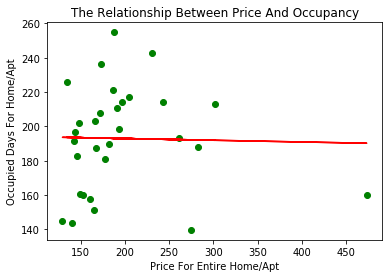

In [9]:
#Analyse The Correlation Between Pirce and Occupancy For Type Of Entire Home/Apt

x=final_df['Apt_Price']
y=final_df['Aocup']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regression_value=round(slope,2)*x+round(intercept,2)
function=f'y='+str(round(slope,2))+'x+'+str(round(intercept,2))


plt.scatter(x,y,facecolor='green')
plt.plot(x,regression_value,color='red',linewidth=1.5)
plt.annotate(function,xy=(300,130),fontsize=20)
plt.title('The Relationship Between Price And Occupancy')
plt.xlabel('Price For Entire Home/Apt')
plt.ylabel('Occupied Days For Home/Apt')
plt;

In [10]:
#Show the Results

print(rvalue)

-0.022396921681552558


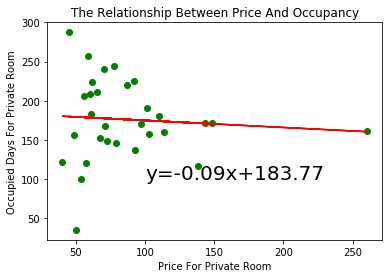

In [11]:
#Analyse The Correlation Between Pirce and Occupancy For Type Of Private Room

x=final_df['PR_Price']
y=final_df['PRocup']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regression_value=round(slope,2)*x+round(intercept,2)
function=f'y='+str(round(slope,2))+'x+'+str(round(intercept,2))


plt.scatter(x,y,facecolor='green')
plt.plot(x,regression_value,color='red',linewidth=1.5)
plt.annotate(function,xy=(100,100),fontsize=20)
plt.title('The Relationship Between Price And Occupancy')
plt.xlabel('Price For Private Room')
plt.ylabel('Occupied Days For Private Room')
plt;

In [12]:
#Show the Results

print(rvalue)

-0.0796307779044359


In [13]:
#Analyse Would Price Change If The Timeframe Change Based On Two Room Types 

Apt_df=file.loc[(file['latitude']>= -32.5468)&
                (file['latitude'] <= -31.7725)&
                (file['longitude'] <= 116.0593)&
                (file['room_type'] == 'Entire home/apt')]


PR_df=file.loc[(file['latitude']>= -32.5468)&
               (file['latitude'] <= -31.7725)&
               (file['longitude'] <= 116.0593)&
               (file['room_type'] == 'Private room')]

Apt_df=Apt_df.copy()
PR_df=PR_df.copy()

In [14]:
#ASegregating Based On Number Of Stay Periods
#Holiday: 20 days
#Short Term: 20 to 60 days
#Medium Term: 60 to 90
#Long Term: >90 days
bins = [0,20,60,90,1000]
group_names = ["Holiday","short term","Medium term","Long Term"]

In [15]:
# For Entire Home/Apt

Apt_df["Stay classification"] =pd.cut(Apt_df["minimum_nights"], bins, labels=group_names)

#Group Neighbourhood And Stay Classification To Uncover The Price Change

avg_price_entire_apt = round(Apt_df.groupby(['neighbourhood','Stay classification'])["price"].mean(),2)

#Output The Result

avg_price_entire_apt.to_csv('OutputData/avg_price_entire_apt.csv', encoding='utf-8')               

In [16]:
avg_price_entire_apt.dropna(how='any')

neighbourhood  Stay classification
ARMADALE       Holiday                163.10
               short term             160.00
BASSENDEAN     Holiday                145.38
               Long Term              133.00
BAYSWATER      Holiday                143.41
                                       ...  
VINCENT        Holiday                148.85
               short term             107.25
               Long Term               74.67
WANNEROO       Holiday                159.00
               Long Term               47.00
Name: price, Length: 76, dtype: float64

In [17]:
# For Private Room

PR_df["Stay classification"] = pd.cut(PR_df["minimum_nights"], bins, labels=group_names, include_lowest=True)

#Group Neighbourhood And Stay Classification To Uncover The Price Change

avg_price_private_room = round(PR_df.groupby(['neighbourhood','Stay classification'])["price"].mean(),2)

#Output The Result

avg_price_private_room.to_csv('OutputData/avg_price_private_room.csv', encoding='utf-8')   

In [18]:
avg_price_private_room.dropna(how='any')

neighbourhood          Stay classification
ARMADALE               Holiday                  82.32
                       short term               42.00
BASSENDEAN             Holiday                  63.33
BAYSWATER              Holiday                  66.39
BELMONT                Holiday                  63.32
                       short term               87.50
CAMBRIDGE              Holiday                  97.50
                       short term               80.00
CANNING                Holiday                  58.14
CLAREMONT              Holiday                  69.86
                       short term               33.00
COCKBURN               Holiday                  76.19
                       Long Term                50.00
COTTESLOE              Holiday                 108.45
EAST FREMANTLE         Holiday                  70.40
                       short term               80.00
FREMANTLE              Holiday                 147.12
                       short term      

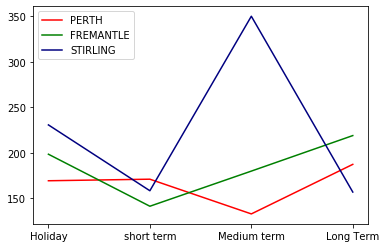

In [19]:
ResetIndex=avg_price_entire_apt.reset_index()
PERTH=ResetIndex.loc[ResetIndex['neighbourhood']=='PERTH']
FREMANTLE=ResetIndex.loc[ResetIndex['neighbourhood']=='FREMANTLE']
STIRLING=ResetIndex.loc[ResetIndex['neighbourhood']=='STIRLING']
label=['PERTH','FREMANTLE','STIRLING']



plt.plot(PERTH['Stay classification'],PERTH['price'],color='red')
plt.plot(FREMANTLE['Stay classification'],FREMANTLE['price'],color='green')
plt.plot(STIRLING['Stay classification'],STIRLING['price'],color='navy')

plt.legend(label);